Задача 5. Решить задачу f(x) = 2*x1^2 + (x2-1)^2 -> min, x∈D = {x∈R^2 | 2x1 + x2 = 0} методом квадратичного штрафа.

В результате работы программы выдать количество сделанных итераций, найденное решение и последовательность {xk} на каждой итерации. Сделать визуализацию решения задачи.

Для критериев остановки возьмем точность omega = 10^(-10)

 Шаг 0:
   x_0=(1.1767508126481695e-05,1.0)
 Шаг 1:
   x_1=(-0.14285131825142527,0.8571209242273689)
 Шаг 2:
   x_2=(-0.19999280033103883,0.799979475320092)
 Шаг 3:
   x_3=(-0.23076136012746779,0.7692106388799202)
 Шаг 4:
   x_4=(-0.2499917936537676,0.7499801881276282)
 Шаг 5:
   x_5=(-0.26314949043093094,0.7368225290174015)
 Шаг 6:
   x_6=(-0.2727187389372434,0.7272533279621262)
 Шаг 7:
   x_7=(-0.2799913753149659,0.7199807371821918)
 Шаг 8:
   x_8=(-0.28570559388464634,0.7142665595077241)
 Шаг 9:
   x_9=(-0.2903138372721216,0.7096583520269357)
 Шаг 10:
   x_10=(-0.29410886291582405,0.7058633577548177)
 Шаг 11:
   x_11=(-0.29728848012395265,0.7026837679974034)
 Шаг 12:
   x_12=(-0.29999115553734285,0.6999811167041855)
 Шаг 13:
   x_13=(-0.30231671401603766,0.6976555795296154)
 Шаг 14:
   x_14=(-0.30433893919618443,0.6956333732697223)
 Шаг 15:
   x_15=(-0.30611354527971385,0.6938587840805465)
 Шаг 16:
   x_16=(-0.30768338936307904,0.6922889551610023)
 Шаг 17:
   x_17=(-0.30908197791560

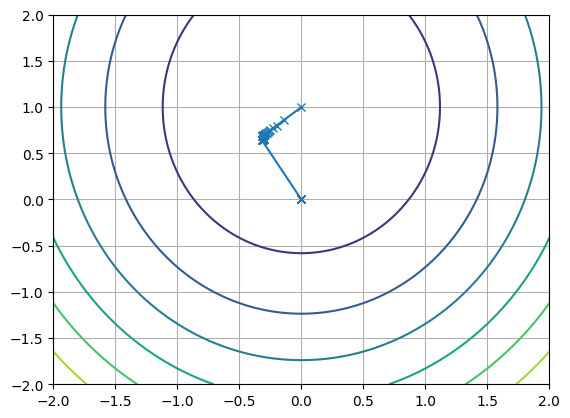

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

x1, x2, c = sp.symbols("x1 x2 c")
f = 2*x1**2 + (x2-1)**2
F = 2*x1 + x2 
phi = f + c/2*(F)**2


f_sym = sp.lambdify((x1, x2), f, "numpy")
df_sym = sp.lambdify((x1, x2), sp.derive_by_array(f, [x1, x2]), "numpy")
phi_sym = sp.lambdify((x1, x2, c), phi, "numpy")
dphi_sym = sp.lambdify((x1, x2, c), sp.derive_by_array(phi, [x1, x2]), "numpy")

eps = 1/32
beta = 10**(-10)
alpha = 1/32
x = np.empty((1000, 2))
omega = 10**(-5)
for k in range(1000):
    c_k = 0.5*k
    
    x_sub = np.array([[1, 1]])
    for k_sub in range(1000):
        d = -dphi_sym(*x_sub[k_sub], c_k)
        while not(phi_sym(*(x_sub[k_sub]+alpha*d), c_k) <= phi_sym(*x_sub[k_sub], c_k) + eps*alpha*np.dot(-d, d)):
            alpha = alpha**2
        
        x_sub = np.append(x_sub, [np.double(x_sub[k_sub] + alpha*d)], axis=0)

        
        if np.linalg.norm(x_sub[k_sub+1] - x_sub[k_sub]) <= beta or abs(phi_sym(*x_sub[k_sub+1], c_k)-phi_sym(*x_sub[k_sub], c_k)) <= beta or np.linalg.norm(dphi_sym(*x_sub[k_sub+1], c_k)) <= beta:
            break
    
    x[k] = x_sub[-1]
    print(f" Шаг {k}:\n   x_{k}=({x[k][0]},{x[k][1]})")

    if np.linalg.norm(x[k] - x[k-1]) <= omega:
        print(f"По критерию остановки: ||x_k+1 - x_k|| <= {omega}. Решение: x_{k} = ({x[k][0]},{x[k][1]})")
        break
    if abs(f_sym(*x[k])-f_sym(*x[k-1])) <= omega:
        print(f"По критерию остановки: |f(x_k+1) - f(x_k)| <= {omega}. Решение: x_{k} = ({x[k][0]},{x[k][1]})")
        break
    
if k==99:
    print(f"Остановка по количеству итераций: 100 \n Последнее решение: x_{k} = ({x[k][0]},{x[k][1]})")

# Рисуем
space = np.linspace(-2, 2, 1000)
x1, x2 = np.meshgrid(space, space)

plt.contour(x1, x2, f_sym(x1, x2))
plt.plot(x.T[0], x.T[1], marker='x')
plt.grid()